In [1]:
#Imported Python packages

import pandas as pd 
from keras import datasets 
import matplotlib.pyplot as plt
import numpy
from keras.utils import to_categorical
from keras import models


Using TensorFlow backend.


In [2]:
#lood a data 

df = pd.read_csv("emnist-balanced-train.csv") 
df.head()

45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.524  0.525  0.526  \
0  36  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  43  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  15  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  42  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.527  0.528  0.529  0.530  0.531  0.532  0.533  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [3]:
df

45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.524  0.525  \
0       36  0    0    0    0    0    0    0    0    0  ...      0      0   
1       43  0    0    0    0    0    0    0    0    0  ...      0      0   
2       15  0    0    0    0    0    0    0    0    0  ...      0      0   
3        4  0    0    0    0    0    0    0    0    0  ...      0      0   
4       42  0    0    0    0    0    0    0    0    0  ...      0      0   
5       26  0    0    0    0    0    0    0    0    0  ...      0      0   
6       32  0    0    0    0    0    0    0    0    0  ...      0      0   
7       20  0    0    0    0    0    0    0    0    0  ...      0      0   
8        1  0    0    0    0    0    0    0    0    0  ...      0      0   
9       46  0    0    0    0    0    0    0    0    0  ...      0      0   
10      43  0    0    0    0    0    0    0    0    0  ...      0      0   
11      15  0    0    0    0    0    0    0    0    0  ...      0      0   
12      13  0    0    0    0    0    0    0    0    0  ...      0      0   
13      24  0    0    0    0    0    0    0    0    0  ...      0      0   
14      12  0    0    0    0    0    0    0    0    0  ...      0      0   
15       5  0    0    0    0    0    0    0    0    0  ...      0      0   
16      17  0    0    0    0    0    0    0    0    0  ...      0      0   
17       3  0    0    0    0    0    0    0    0    0  ...      0      0   
18      40  0    0    0    0    0    0    0    0    0  ...      0      0   
19      42  0    0    0    0    0    0    0    0    0  ...      0      0   
20      14  0    0    0    0    0    0    0    0    0  ...      0      0   
21      14  0    0    0    0    0    0    0    0    0  ...      0      0   
22      44  0    0    0    0    0    0    0    0    0  ...      0      0   
23      32  0    0    0    0    0    0    0    0    0  ...      0      0   
24       3  0    0    0    0    0    0    0    0    0  ...      0      0   
25      19  0    0    0    0    0    0    0    0    0  ...      0      0   
26      42  0    0    0    0    0    0    0    0    0  ...      0      0   
27      29  0    0    0    0    0    0    0    0    0  ...      0      0   
28      40  0    0    0    0    0    0    0    0    0  ...      0      0   
29      17  0    0    0    0    0    0    0    0    0  ...      0      0   
...     .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
112769  12  0    0    0    0    0    0    0    0    0  ...      0      0   
112770  11  0    0    0    0    0    0    0    0    0  ...      0      0   
112771   6  0    0    0    0    0    0    0    0    0  ...      0      0   
112772  35  0    0    0    0    0    0    0    0    0  ...      0      0   
112773  14  0    0    0    0    0    0    0    0    0  ...      0      0   
112774  43  0    0    0    0    0    0    0    0    0  ...      0      0   
112775  39  0    0    0    0    0    0    0    0    0  ...      0      0   
112776  16  0    0    0    0    0    0    0    0    0  ...      0      0   
112777  44  0    0    0    0    0    0    0    0    0  ...      0      0   
112778  15  0    0    0    0    0    0    0    0    0  ...      0      0   
112779  35  0    0    0    0    0    0    0    0    0  ...      0      0   
112780  26  0    0    0    0    0    0    0    0    0  ...      0      0   
112781   9  0    0    0    0    0    0    0    0    0  ...      0      0   
112782  19  0    0    0    0    0    0    0    0    0  ...      0      0   
112783  24  0    0    0    0    0    0    0    0    0  ...      0      0   
112784   8  0    0    0    0    0    0    0    0    0  ...      0      0   
112785  39  0    0    0    0    0    0    0    0    0  ...      0      0   
112786  40  0    0    0    0    0    0    0    0    0  ...      0      0   
112787   7  0    0    0    0    0    0    0    0    0  ...      0      0   
112788  26  0    0    0    0    0    0    0    0    0  ...      0      0   
112789  18  0    0    0    0    0    0    0    0    0  .

In [4]:
#Return a tuple representing the dimensionality of the DataFrame
df.shape

(112799, 785)

In [9]:
## Prepare input data

def prep_data(raw):
    
    raw = numpy.array(raw)
    y = raw[:, 0]
    x = raw[:, 1:]
    return x,y

     

In [10]:
# Create x and y from the prep_data function
x,y = prep_data(df)

In [11]:
#check the size of x data
x.shape

(112799, 784)

In [12]:
#check the size of y data
y.shape

(112799,)

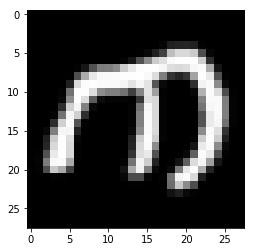

In [13]:
# Plot an image with it's correct value
plt.imshow(x[20].reshape(28,28),cmap='gray')
plt.show()

In [14]:
print (y[20])

14


In [15]:
x = x.reshape(112799,28,28,1)

In [16]:
#Scale image
x = x/255

In [17]:
#onehot enchoding of labels
y = to_categorical(y)
print(y.shape)

(112799, 47)


In [18]:
#Convolution Neural Network
model = models.Sequential()

In [19]:
from keras import layers
#add the first layer
model.add(layers.Conv2D(filters=10,kernel_size=(3,3),
                       input_shape=(28,28,1), activation ="relu"))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#maxpooling
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [21]:
model.add(layers.Flatten())

In [27]:
#add the hidden layer
model.add(layers.Dense(100,activation='relu'))

#add the output layer

model.add(layers.Dense(47,activation='softmax'))

In [28]:
#Compile the neural network 
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

In [31]:
#train the model
model.fit(x,y,epochs=10,batch_size=2000,validation_split=0.2)

Train on 90239 samples, validate on 22560 samples
Epoch 1/10
90239/90239 [==============================] - 27s 304us/step - loss: 0.2663 - acc: 0.9090 - val_loss: 0.5688 - val_acc: 0.8295
Epoch 2/10
90239/90239 [==============================] - 27s 304us/step - loss: 0.2641 - acc: 0.9095 - val_loss: 0.5712 - val_acc: 0.8287
Epoch 3/10
90239/90239 [==============================] - 28s 307us/step - loss: 0.2619 - acc: 0.9108 - val_loss: 0.5732 - val_acc: 0.8289
Epoch 4/10
90239/90239 [==============================] - 27s 302us/step - loss: 0.2593 - acc: 0.9113 - val_loss: 0.5761 - val_acc: 0.8281
Epoch 5/10
90239/90239 [==============================] - 28s 306us/step - loss: 0.2571 - acc: 0.9119 - val_loss: 0.5793 - val_acc: 0.8283
Epoch 6/10
90239/90239 [==============================] - 27s 303us/step - loss: 0.2547 - acc: 0.9129 - val_loss: 0.5798 - val_acc: 0.8271
Epoch 7/10
90239/90239 [==============================] - 28s 310us/step - loss: 0.2528 - acc: 0.9136 - val_loss: 0.

In [37]:
import cv2
img = cv2.imread("a small.png",0)
print (img.shape)

(413, 1023)


In [38]:
model.predict_classes(img.reshape(1,1,28,28))

ValueError: cannot reshape array of size 422499 into shape (1,1,28,28)